In [ ]:
import zipfile
import os

In [2]:
!pip install kaggle

In [3]:
!kaggle competitions download -c forecasting-unit-sales-vit-task-2

forecasting-unit-sales-vit-task-2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()


In [280]:
import pandas as pd
training_data = pd.read_csv('train.csv')
training_data.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0


In [281]:
training_data.shape

(101490, 8)

In [282]:
training_data.dtypes

ID             object
date           object
Item Id        object
Item Name      object
ad_spend      float64
anarix_id      object
units         float64
unit_price    float64
dtype: object

In [283]:
print(training_data.isnull().sum())

ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64


In [284]:
rows_with_itemid_nan = training_data[training_data['Item Id'].isna()]
print(rows_with_itemid_nan)

                   ID        date Item Id Item Name  ad_spend anarix_id  \
95717  2024-04-07_nan  2024-04-07     NaN       NaN       0.0  NAPQUEEN   
96832  2024-04-18_nan  2024-04-18     NaN       NaN       0.0  NAPQUEEN   

       units  unit_price  
95717    NaN         0.0  
96832    NaN         0.0  


In [285]:
training_data = training_data.dropna(subset=['Item Id'])
print(training_data.isnull().sum())

ID                0
date              0
Item Id           0
Item Name      1830
ad_spend      24187
anarix_id         0
units         17896
unit_price        0
dtype: int64


In [286]:
no_of_zeros=(training_data['unit_price'] == 0).sum()
print(no_of_zeros)

80173


In [287]:
other_columns = ['ad_spend', 'units']

for column in other_columns:
    no_of_zeros = (training_data[column] == 0).sum()
    print(no_of_zeros)

23205
35292


In [288]:
unique_Item_Names = training_data['Item Name'].unique().size
print(unique_values)

200


In [289]:
rows_with_Itemname_nan = training_data[training_data['Item Name'].isna()]
print(rows_with_Itemname_nan)

                           ID        date     Item Id Item Name  ad_spend  \
57040   2023-08-20_B0CFV6V981  2023-08-20  B0CFV6V981       NaN       NaN   
57298   2023-08-21_B0CFV6V981  2023-08-21  B0CFV6V981       NaN       NaN   
57479   2023-08-22_B0CFV6V981  2023-08-22  B0CFV6V981       NaN       NaN   
57655   2023-08-23_B0CFV6V981  2023-08-23  B0CFV6V981       NaN       NaN   
57826   2023-08-24_B0CFV6V981  2023-08-24  B0CFV6V981       NaN       NaN   
...                       ...         ...         ...       ...       ...   
101485  2024-05-31_B0CR4BGLK5  2024-05-31  B0CR4BGLK5       NaN    604.73   
101486  2024-05-31_B0CR4BG4ZW  2024-05-31  B0CR4BG4ZW       NaN    261.21   
101487  2024-05-31_B0CR49NR3B  2024-05-31  B0CR49NR3B       NaN      0.00   
101488  2024-05-31_B0CR49N6MQ  2024-05-31  B0CR49N6MQ       NaN      0.00   
101489  2024-05-31_B0CR4BK4FW  2024-05-31  B0CR4BK4FW       NaN      0.00   

       anarix_id  units  unit_price  
57040   NAPQUEEN    0.0        0.00  

In [290]:
item_ids_with_nan_name = training_data[training_data['Item Name'].isna()]['Item Id'].unique()
item_ids_with_nan_name_list = item_ids_with_nan_name.tolist()
print(item_ids_with_nan_name_list)

['B0CFV6V981', 'ASIN_BLANK', 'B0C2CPH9GZ', 'B0CLM65TTQ', 'B0CQVL6NXT', 'B0CQVL5T61', 'B0CQVLFPBQ', 'B0CR4BK4FW', 'B0CR49N6MQ', 'B0CR49BQRS', 'B0CR4C98FS', 'B0CR4C5WXS', 'B0CR4BG4ZW', 'B0CR49NR3B', 'B0CR4BGLK5', 'B0CY5KFQBD', 'B0CY5QQ49F', 'B0CY5LR4VX']


In [291]:
print(f"Size of the list: {len(item_ids_with_nan_name_list)}")

Size of the list: 18


In [292]:
filtered_data = training_data[training_data['Item Id'].isin(item_ids_with_nan_name_list)]
nan_ad_spend_count = filtered_data['ad_spend'].isna().sum()
nan_units_count = filtered_data['units'].isna().sum()
print(f"Nan count of add spend in filtered data: {nan_ad_spend_count}")
print(f"Nan count of units in filtered data: {nan_units_count}")

Nan count of add spend in filtered data: 167
Nan count of units in filtered data: 1021


In [293]:
print(filtered_data)

                           ID        date     Item Id Item Name  ad_spend  \
57040   2023-08-20_B0CFV6V981  2023-08-20  B0CFV6V981       NaN       NaN   
57298   2023-08-21_B0CFV6V981  2023-08-21  B0CFV6V981       NaN       NaN   
57479   2023-08-22_B0CFV6V981  2023-08-22  B0CFV6V981       NaN       NaN   
57655   2023-08-23_B0CFV6V981  2023-08-23  B0CFV6V981       NaN       NaN   
57826   2023-08-24_B0CFV6V981  2023-08-24  B0CFV6V981       NaN       NaN   
...                       ...         ...         ...       ...       ...   
101485  2024-05-31_B0CR4BGLK5  2024-05-31  B0CR4BGLK5       NaN    604.73   
101486  2024-05-31_B0CR4BG4ZW  2024-05-31  B0CR4BG4ZW       NaN    261.21   
101487  2024-05-31_B0CR49NR3B  2024-05-31  B0CR49NR3B       NaN      0.00   
101488  2024-05-31_B0CR49N6MQ  2024-05-31  B0CR49N6MQ       NaN      0.00   
101489  2024-05-31_B0CR4BK4FW  2024-05-31  B0CR4BK4FW       NaN      0.00   

       anarix_id  units  unit_price  
57040   NAPQUEEN    0.0        0.00  

In [294]:
training_data = training_data[~training_data['Item Id'].isin(item_ids_with_nan_name_list)]
print(training_data.isnull().sum())

ID                0
date              0
Item Id           0
Item Name         0
ad_spend      24020
anarix_id         0
units         16875
unit_price        0
dtype: int64


In [295]:
data_with_negative_units = training_data[(training_data['units'] < 0)]
print(data_with_negative_units)

                           ID        date     Item Id  \
204     2022-04-24_B09MR2FY5D  2022-04-24  B09MR2FY5D   
243     2022-04-26_B09KTJRHC7  2022-04-26  B09KTJRHC7   
275     2022-04-27_B09MR3XT5G  2022-04-27  B09MR3XT5G   
343     2022-04-29_B09MR4B13C  2022-04-29  B09MR4B13C   
363     2022-04-30_B09KTMKDKJ  2022-04-30  B09KTMKDKJ   
...                       ...         ...         ...   
100812  2024-05-25_B0BG2VYWSG  2024-05-25  B0BG2VYWSG   
100951  2024-05-27_B09MR36MLJ  2024-05-27  B09MR36MLJ   
101405  2024-05-31_B09KTF8ZDQ  2024-05-31  B09KTF8ZDQ   
101410  2024-05-31_B09MR3RSW8  2024-05-31  B09MR3RSW8   
101478  2024-05-31_B0BRCYQNSW  2024-05-31  B0BRCYQNSW   

                                                Item Name  ad_spend anarix_id  \
204     NapQueen Margaret 10" Charcoal Memory Foam Mat...       NaN  NAPQUEEN   
243           NapQueen Elsa 6" Innerspring Mattress, Full       NaN  NAPQUEEN   
275     NapQueen Margaret 8" Charcoal Memory Foam Matt...       NaN  NAP

In [296]:
training_data['date'] = pd.to_datetime(training_data['date'])
training_data['month'] = training_data['date'].dt.strftime('%B') 
training_data['year_month'] = training_data['date'].dt.to_period('M')  # Year-Month format
training_data.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,month,year_month
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0,April,2022-04
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0,April,2022-04
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0,April,2022-04
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0,April,2022-04
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0,April,2022-04


C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\4160326297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_ad_spend, x='year_month', y='ad_spend', palette='viridis')


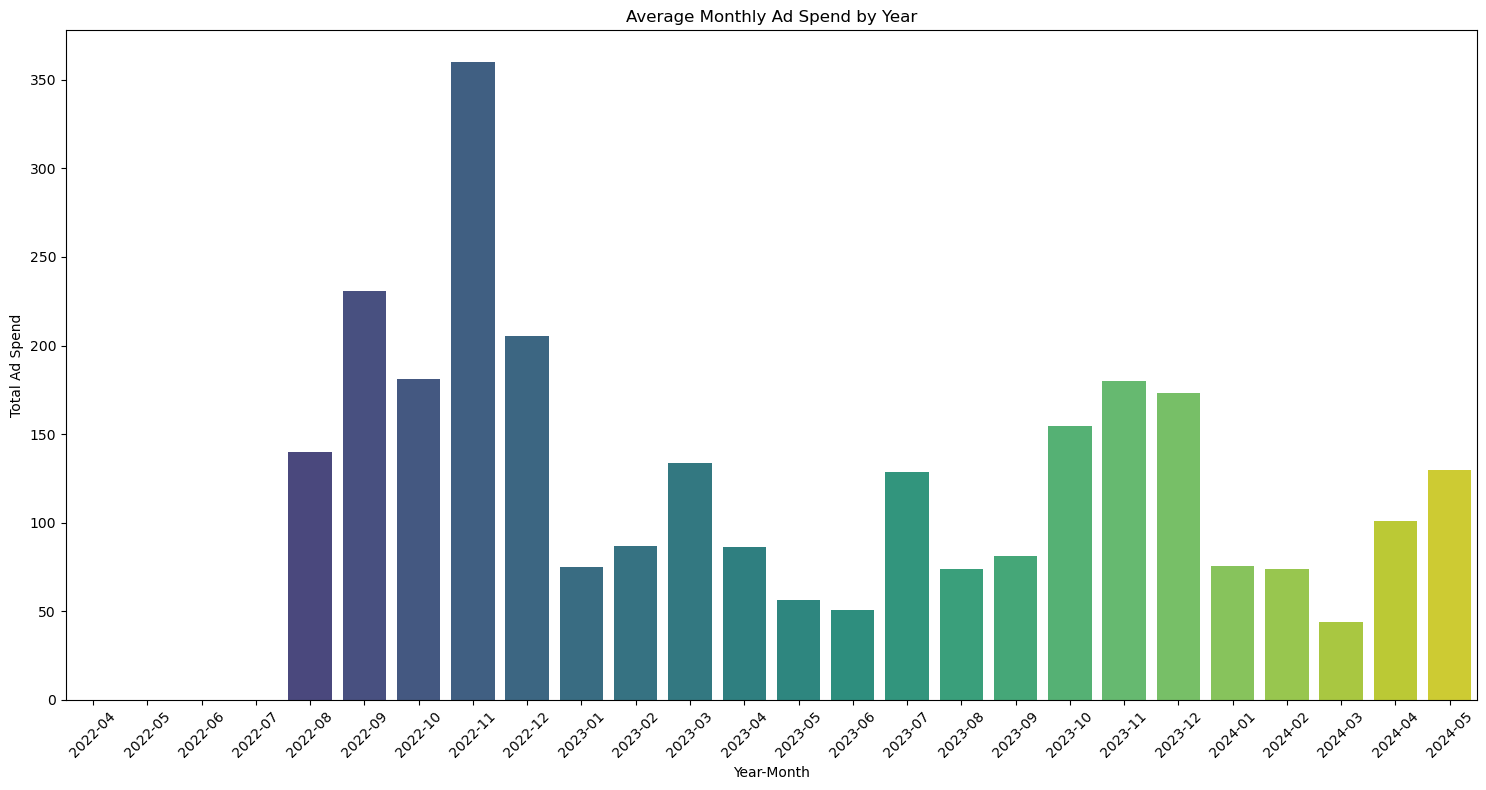

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_ad_spend = training_data.groupby('year_month')['ad_spend'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_ad_spend, x='year_month', y='ad_spend', palette='viridis')
plt.title('Average Monthly Ad Spend by Year')
plt.xlabel('Year-Month')
plt.ylabel('Total Ad Spend')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to make room for the x-axis labels
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\3964638669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_ad_spend, x='year_month', y='unit_price', palette='viridis')


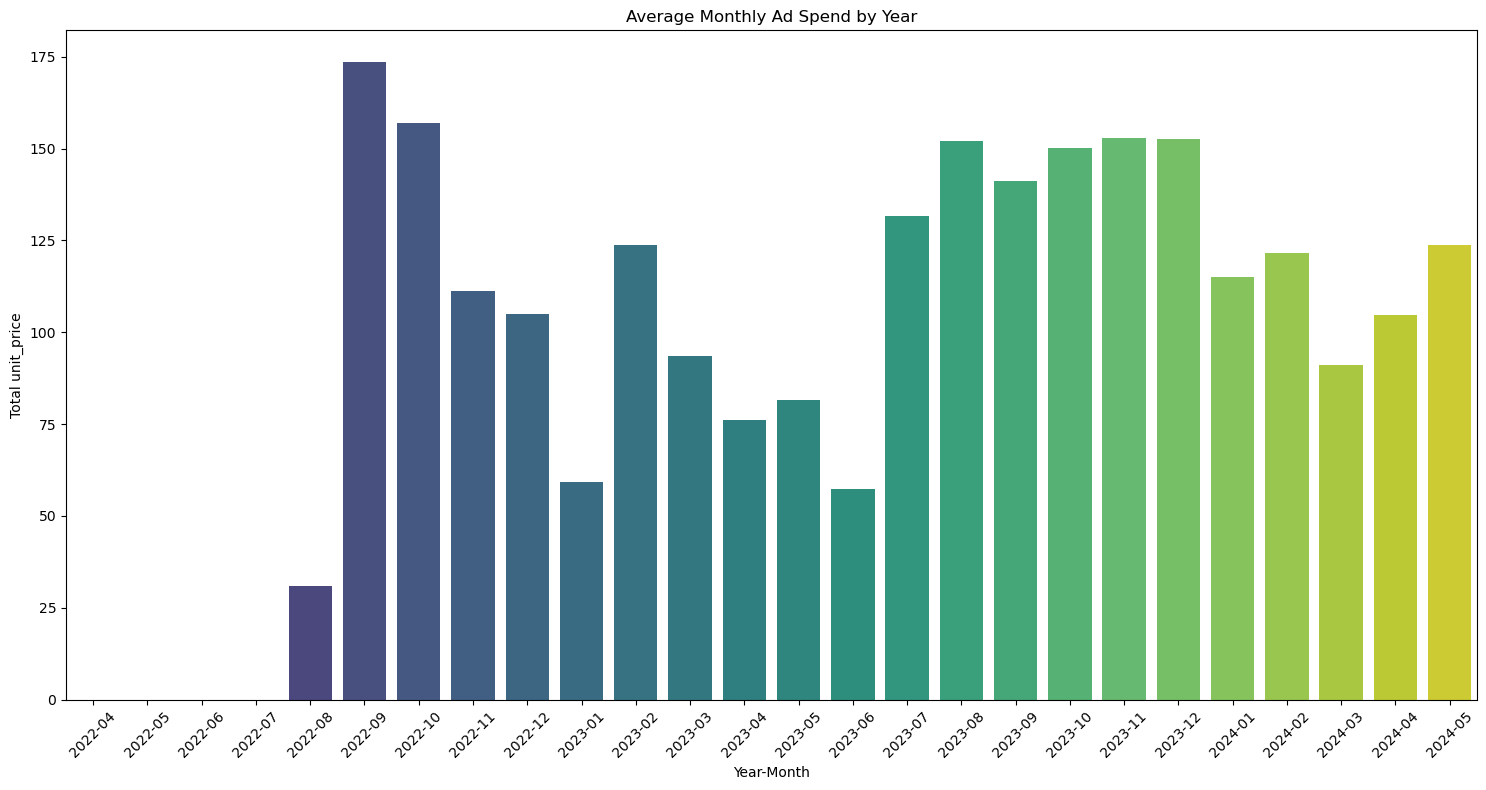

In [298]:
monthly_ad_spend = training_data.groupby('year_month')['unit_price'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_ad_spend, x='year_month', y='unit_price', palette='viridis')
plt.title('Average Monthly Ad Spend by Year')
plt.xlabel('Year-Month')
plt.ylabel('Total unit_price')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to make room for the x-axis labels
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\3610950206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_ad_spend, x='year_month', y='units', palette='viridis')


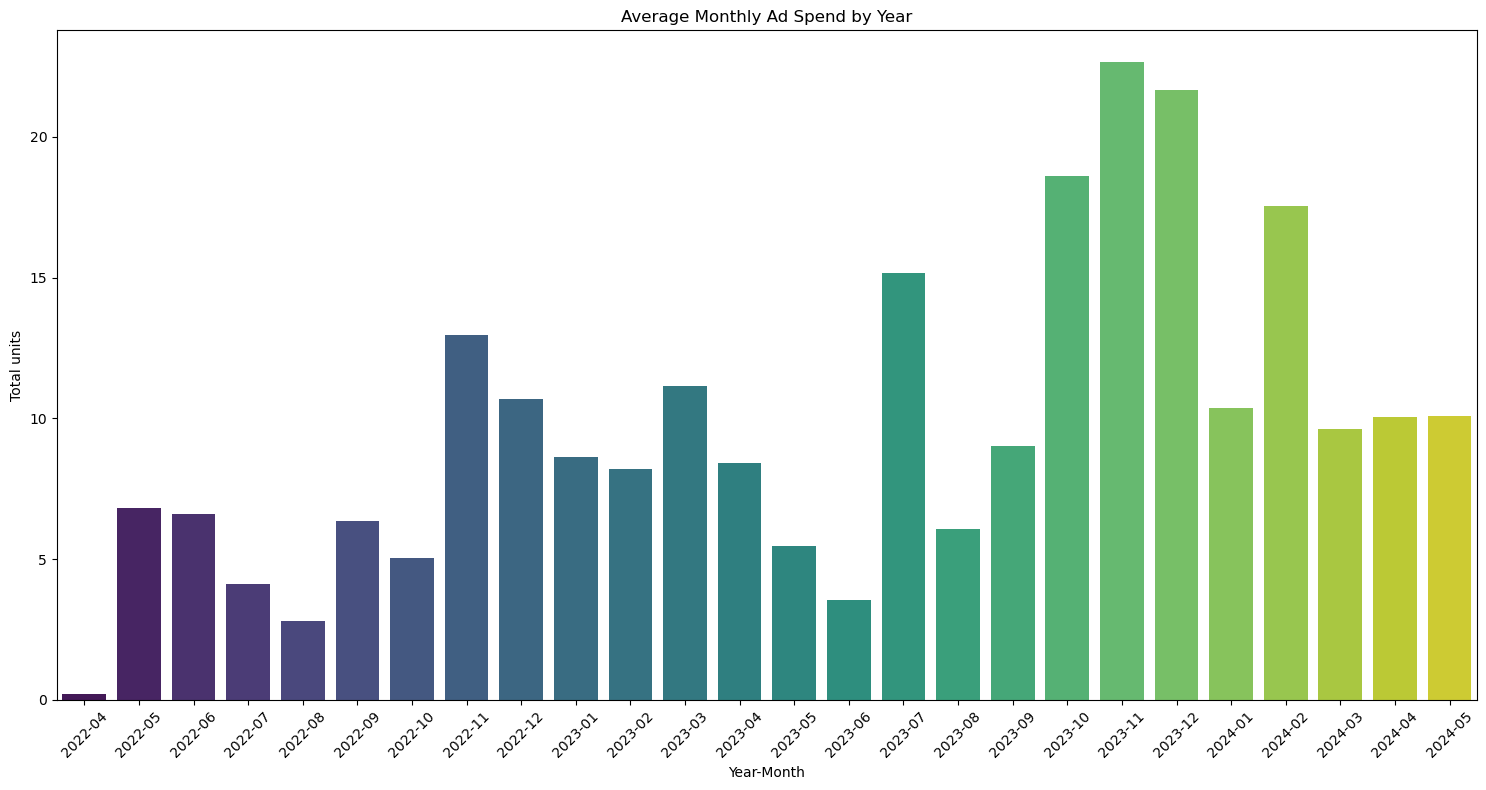

In [299]:
monthly_ad_spend = training_data.groupby('year_month')['units'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_ad_spend, x='year_month', y='units', palette='viridis')
plt.title('Average Monthly Ad Spend by Year')
plt.xlabel('Year-Month')
plt.ylabel('Total units')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to make room for the x-axis labels
plt.show()

In [300]:
first_four_months = training_data['year_month'].unique()[:4]
print(first_four_months)

<PeriodArray>
['2022-04', '2022-05', '2022-06', '2022-07']
Length: 4, dtype: period[M]


In [301]:
for month in first_four_months:
    training_data.loc[training_data['year_month'] == month, ['unit_price', 'ad_spend']] = training_data.loc[training_data['year_month'] == month, ['unit_price', 'ad_spend']].fillna(0)

In [302]:
training_data.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price,month,year_month
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",0.0,NAPQUEEN,0.0,0.0,April,2022-04
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,0.0,NAPQUEEN,0.0,0.0,April,2022-04
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",0.0,NAPQUEEN,0.0,0.0,April,2022-04
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",0.0,NAPQUEEN,0.0,0.0,April,2022-04
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",0.0,NAPQUEEN,0.0,0.0,April,2022-04


In [303]:
print((training_data['units'] < 0).sum())

1631


In [304]:
training_data = training_data[training_data['units'] >= 0]
print((training_data['units'] < 0).sum())

0


In [305]:
training_data.shape

(81152, 10)

In [334]:
print(training_data.isnull().sum())

ID                0
date              0
Item Id           0
Item Name         0
ad_spend      18595
anarix_id         0
units             0
unit_price        0
month             0
year_month        0
dtype: int64


In [356]:
training_data = training_data[~((training_data['ad_spend'].isna()) & (training_data['units'] == 0) & (training_data['unit_price'] == 0))]

In [360]:
training_data['ad_spend'].fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\3950097619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data['ad_spend'].fillna(0, inplace=True)


In [362]:
print(training_data.isnull().sum())

ID            0
date          0
Item Id       0
Item Name     0
ad_spend      0
anarix_id     0
units         0
unit_price    0
month         0
year_month    0
dtype: int64


In [364]:
training_data.shape

(59948, 10)

In [366]:
training_data.columns

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price', 'month', 'year_month'],
      dtype='object')

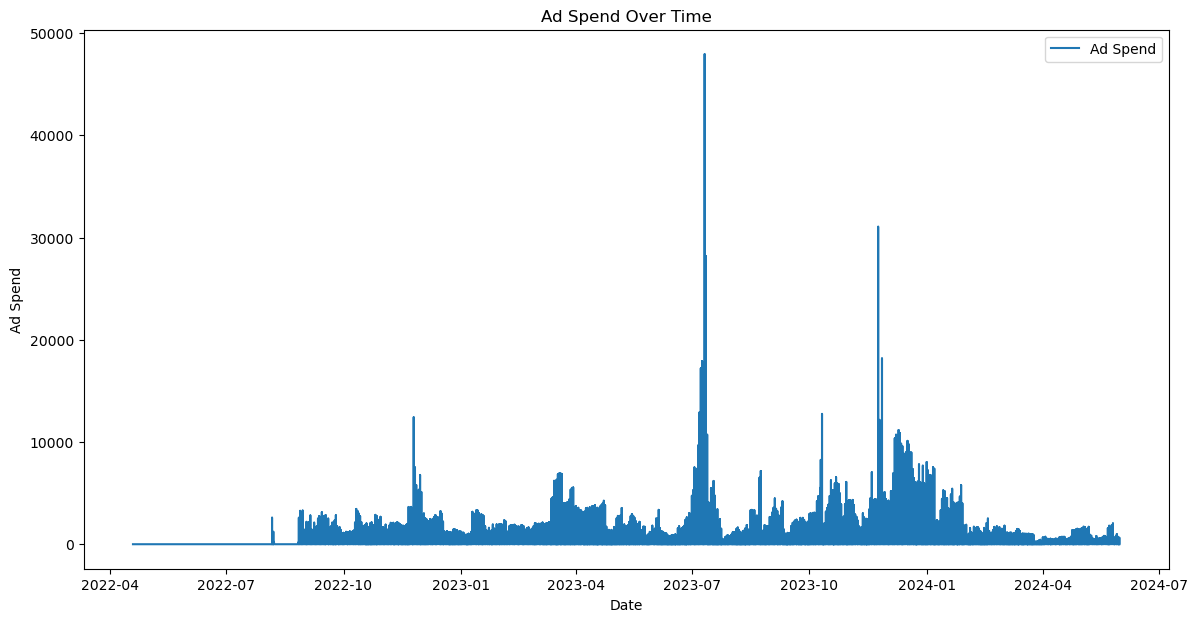

In [368]:
training_data.set_index('date', inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(training_data['ad_spend'], label='Ad Spend')
plt.title('Ad Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Ad Spend')
plt.legend()
plt.show()

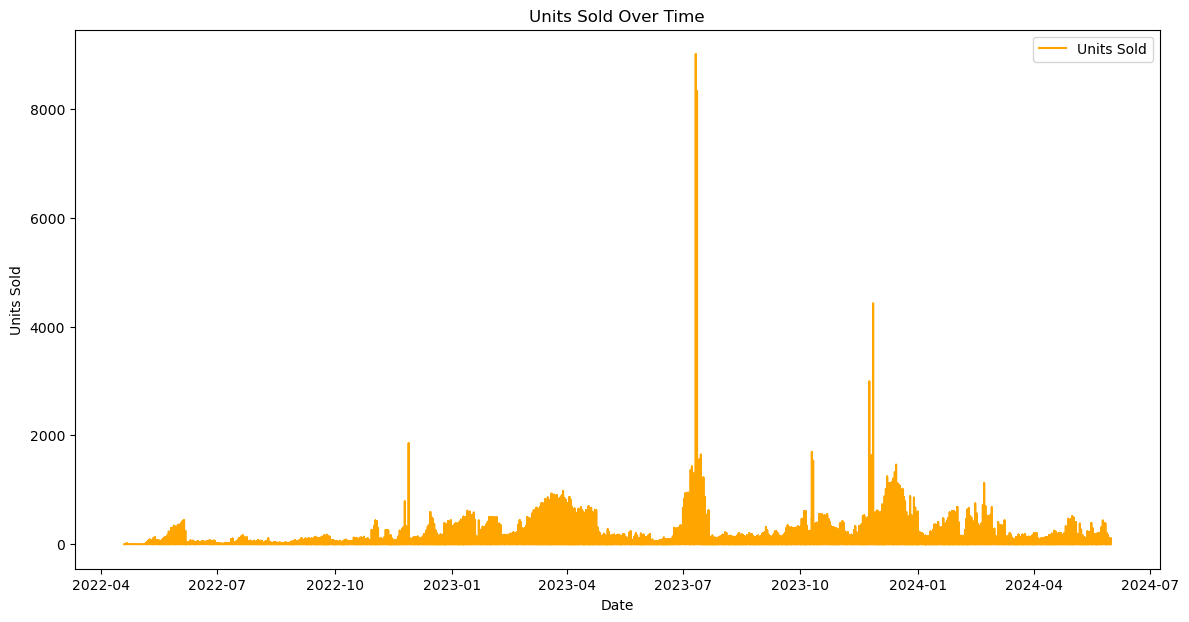

In [372]:
# Plot units sold over time
plt.figure(figsize=(14, 7))
plt.plot(training_data['units'], label='Units Sold', color='orange')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

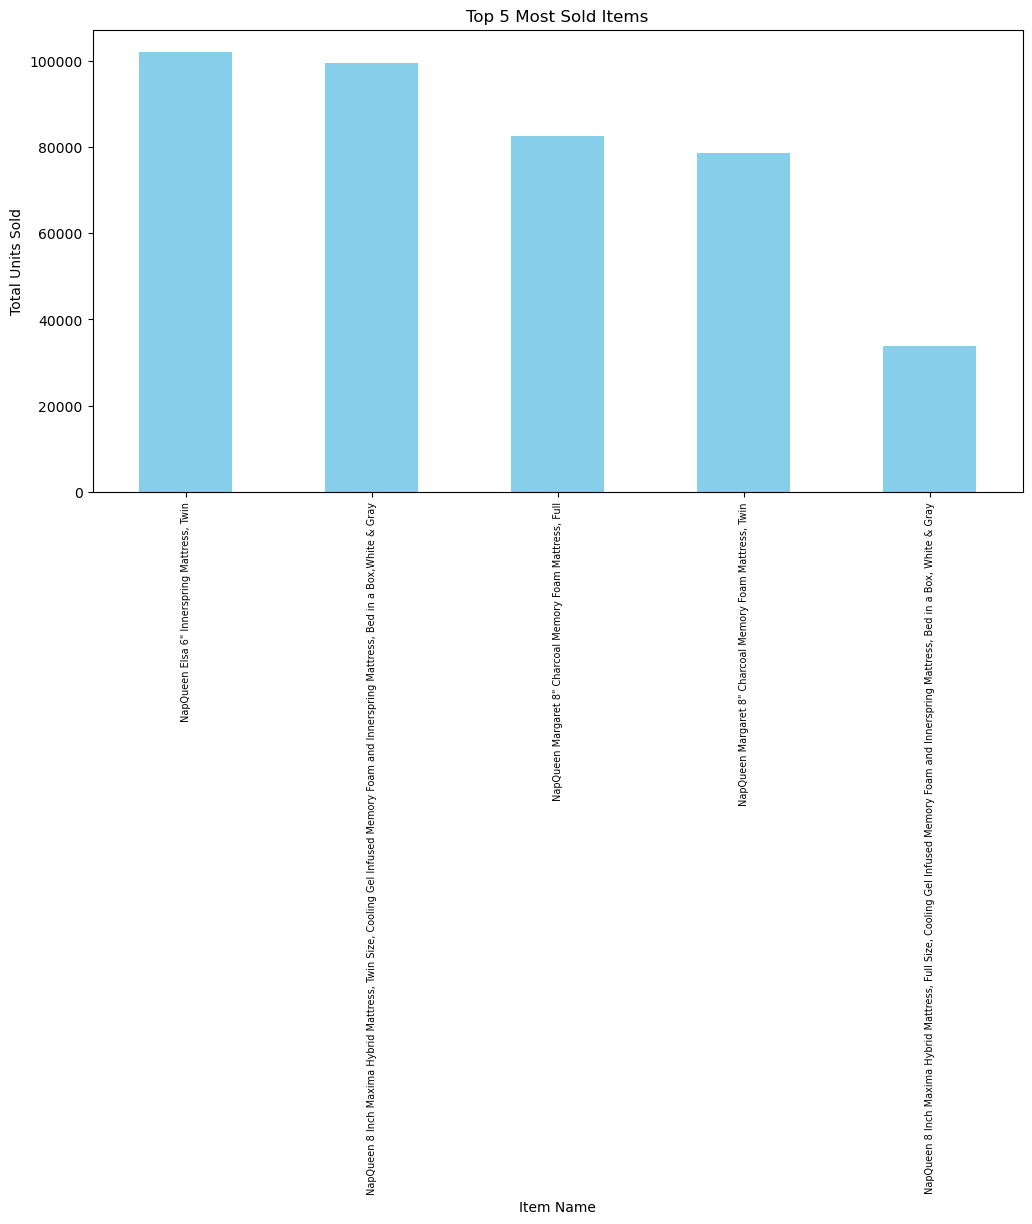

In [408]:
most_sold_items = training_data.groupby('Item Name')['units'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
most_sold_items.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Sold Items')
plt.xlabel('Item Name')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=90, fontsize=7) 
plt.show()

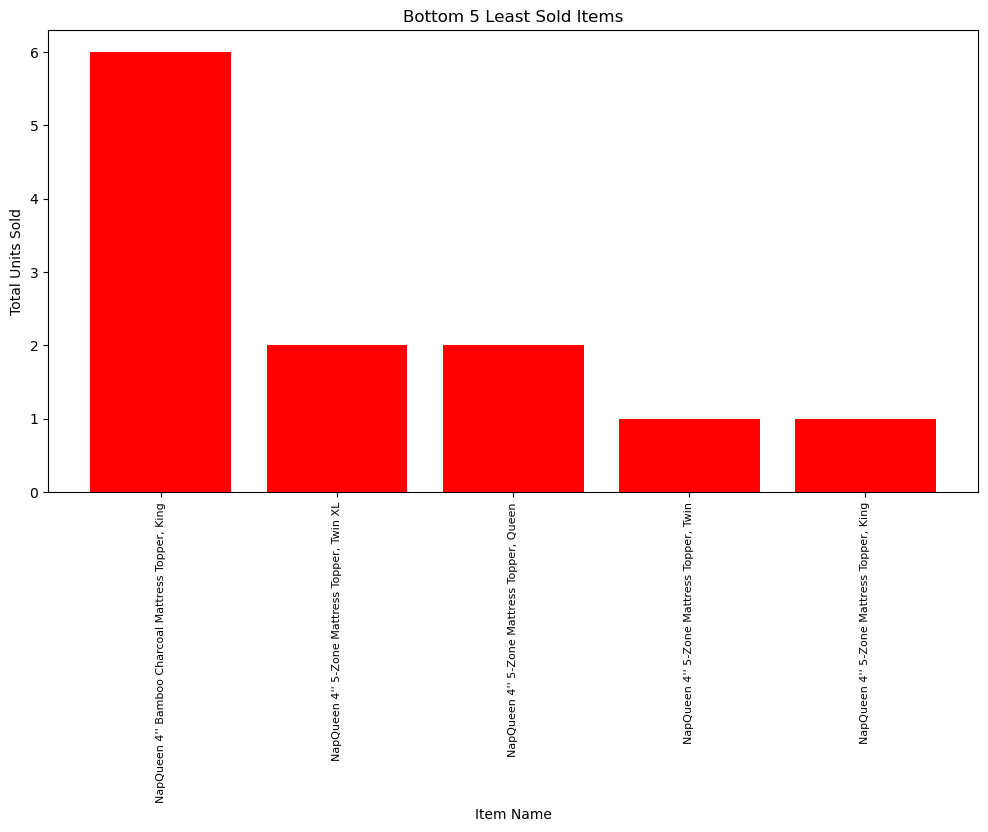

In [412]:
plt.figure(figsize=(12, 6))
colors_least = ['red' if value < most_sold_items.mean() else 'green' for value in most_sold_items.tail(5)]
bars_least = plt.bar(most_sold_items.tail(5).index, most_sold_items.tail(5), color=colors_least)
plt.title('Bottom 5 Least Sold Items')
plt.xlabel('Item Name')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=90, fontsize=8)  
plt.show()

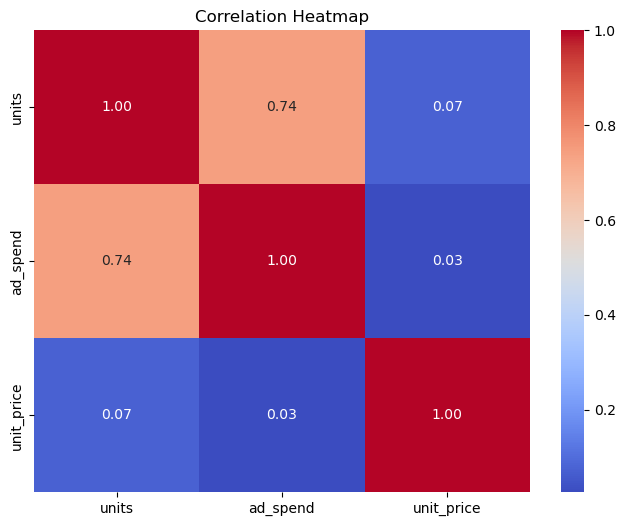

In [420]:
correlation_matrix = training_data[['units', 'ad_spend', 'unit_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [428]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [436]:
monthly_data = training_data['units'].resample('M').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\890757272.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = training_data['units'].resample('M').sum()


In [438]:
def sarima_model_eval(order, seasonal_order, data):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(data) - len(data) // 5, end=len(data) - 1)
    
    mse = mean_squared_error(data[-len(predictions):], predictions)
    mae = mean_absolute_error(data[-len(predictions):], predictions)
    rmse = np.sqrt(mse)

    return mse, mae, rmse

In [442]:
p = d = q = range(0, 3) 
P = D = Q = range(0, 2) 
S = [12]  
results = []
for order in [(i, j, k) for i in p for j in d for k in q]:
    for seasonal_order in [(i, j, k, l) for i in P for j in D for k in Q for l in S]:
        try:
            mse, mae, rmse = sarima_model_eval(order, seasonal_order, monthly_data)
            results.append((order, seasonal_order, mse, mae, rmse))
        except Exception as e:
            print(f"Error with order {order} and seasonal_order {seasonal_order}: {e}")
results_df = pd.DataFrame(results, columns=['order', 'seasonal_order', 'MSE', 'MAE', 'RMSE'])

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. A

In [444]:
best_model = results_df.loc[results_df['MSE'].idxmin()]
print("Best Model:")
print(best_model)

Best Model:
order                    (2, 0, 1)
seasonal_order       (1, 0, 0, 12)
MSE               188894967.021748
MAE                    11134.89613
RMSE                  13743.906542
Name: 156, dtype: object


Karthick Roshan M

In [448]:
best_order = best_model['order']
best_seasonal_order = best_model['seasonal_order']
final_model = SARIMAX(monthly_data, order=best_order, seasonal_order=best_seasonal_order)
final_model_fit = final_model.fit(disp=False)
print(final_model_fit.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               units   No. Observations:                   26
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood                -294.899
Date:                             Fri, 02 Aug 2024   AIC                            599.799
Time:                                     17:34:30   BIC                            606.089
Sample:                                 04-30-2022   HQIC                           601.610
                                      - 05-31-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5835      0.000   4316.686      0.000       1.583       1.584
ar.L2         -0.5835      

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


C:\Users\Admin\AppData\Local\Temp\ipykernel_13912\2685138649.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


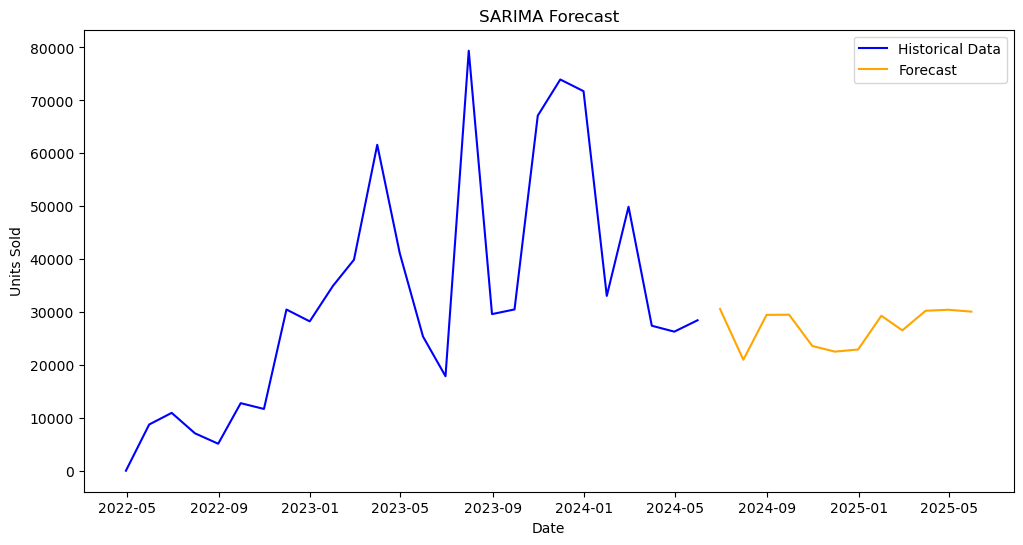

In [450]:
forecast = final_model_fit.get_forecast(steps=12)  
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()